<a href="https://colab.research.google.com/github/dydtjrwls1/project/blob/main/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/gdrive/MyDrive/Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

# Baseline Model

In [42]:
df[target].value_counts(normalize=True)

0    0.656136
1    0.343864
Name: LeaveOrNot, dtype: float64

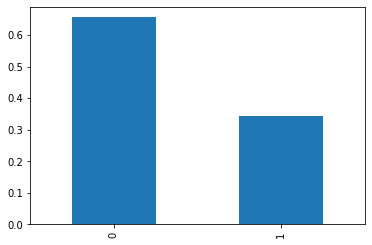

In [23]:
df[target].value_counts(normalize=True).plot.bar();

In [5]:
from sklearn.model_selection import train_test_split

train ,test = train_test_split(df)
train, val = train_test_split(train)

target = 'LeaveOrNot'
features = train.drop(target, axis=1).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [6]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 468 kB/s 


# RandomForestClassifier

In [18]:
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(random_state=2)
)

dists = {
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1) 
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                   

In [54]:
pipe = clf.best_estimator_

from sklearn.metrics import roc_auc_score

y_pred = pipe.predict(X_val)
roc_auc_score(y_val, y_pred)

0.798783062576975

In [56]:
pipe.score(X_test, y_test)

0.8573883161512027

In [55]:
y_pred = pipe.predict(X_test)
roc_auc_score(y_test, y_pred)

0.8059518377693283

# DecisionTree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OneHotEncoder

pipe = make_pipeline(
  OneHotEncoder(),
  DecisionTreeClassifier(random_state=2)    
)

dists = {
    'decisiontreeclassifier__max_depth': [5, 10, 15, 20, None]
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=50. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('onehotencoder',
                                              OneHotEncoder(cols=None,
                                                            drop_invariant=False,
                                                            handle_missing='value',
                                                            handle_unknown='value',
                                                            return_df=True,
                                                            use_cat_names=False,
                                                            verbose=0)),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                                     class_weight=None,
                                                 

In [16]:
pipe = clf.best_estimator_

y_pred = pipe.predict(X_val)
roc_auc_score(y_val, y_pred)

0.7783737024221454

In [17]:
y_pred = pipe.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7672851711026617

# SHAP

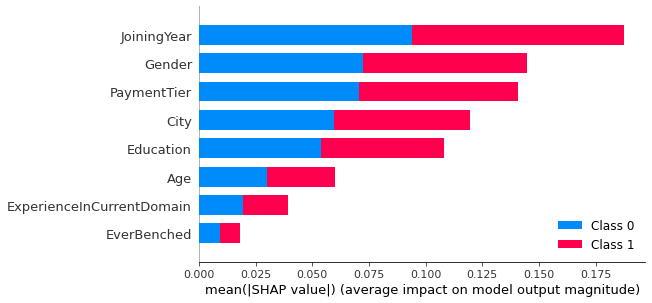

In [39]:
import shap

model = clf.best_estimator_
explainer = shap.TreeExplainer(model['randomforestclassifier'])

X_test_encoded = model['ordinalencoder'].transform(X_test)e
shap_values = explainer.shap_values(X_test_encoded.iloc[:3000])
shap.summary_plot(shap_values, X_test_encoded.iloc[:3000], plot_type="bar")